In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!apt install unzip


Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [4]:
!unzip -uq "/content/drive/My Drive/pcd.zip" -d "/content/drive/My Drive/playing card dataset"


In [5]:
IMAGE_SIZE = [224, 224]


In [6]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras import optimizers
from keras import applications
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten, Dropout


Using TensorFlow backend.


In [7]:
base_model=keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3))

58892288/58889256 [==============================] - 6s 0us/step


In [8]:
base_model.trainable = False


In [9]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [10]:
training_set = train_datagen.flow_from_directory("/content/drive/My Drive/playing card dataset/pcd/Train",
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 11353 images belonging to 52 classes.


In [11]:

test_set = test_datagen.flow_from_directory("/content/drive/My Drive/playing card dataset/pcd/Test",
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical',
                                            )

Found 1442 images belonging to 52 classes.


In [12]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
model=Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.35))
model.add(Dense(512,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.35))
model.add(Dense(52,activation='softmax',kernel_initializer='glorot_normal'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               12845568  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 52)               

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", patience =10)
model.compile(optimizer=keras.optimizers.Adam(1e-5),loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=100,validation_data=test_set,workers=10,use_multiprocessing=True, callbacks=[early_stop])

Epoch 1/100
710/710 [==============================] - 144s 203ms/step - loss: 1.2938 - accuracy: 0.6362 - val_loss: 2.3736 - val_accuracy: 0.4702
Epoch 1/100
Epoch 2/100
710/710 [==============================] - 142s 200ms/step - loss: 1.2218 - accuracy: 0.6594 - val_loss: 2.4268 - val_accuracy: 0.4785
Epoch 3/100
710/710 [==============================] - 142s 199ms/step - loss: 1.1479 - accuracy: 0.6788 - val_loss: 1.0476 - val_accuracy: 0.4799
Epoch 4/100
710/710 [==============================] - 142s 200ms/step - loss: 1.0765 - accuracy: 0.7019 - val_loss: 2.0149 - val_accuracy: 0.4875
Epoch 5/100
710/710 [==============================] - 142s 200ms/step - loss: 1.0197 - accuracy: 0.7221 - val_loss: 1.5022 - val_accuracy: 0.5042
Epoch 6/100
710/710 [==============================] - 142s 200ms/step - loss: 0.9610 - accuracy: 0.7375 - val_loss: 1.5386 - val_accuracy: 0.5062
Epoch 7/100
710/710 [==============================] - 142s 200ms/step - loss: 0.8944 - accuracy: 0.7600 -

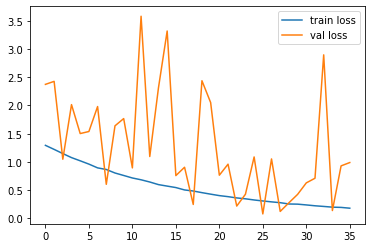

In [19]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

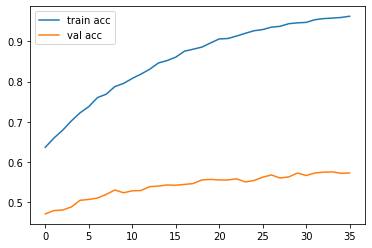

In [20]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [38]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [22]:
from tensorflow.keras.models import load_model

model.save('playingcardfinalmaybe.h5')

In [65]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
img = image.load_img("/content/drive/My Drive/test/six c.jpg", target_size=(224,224))

In [66]:
image = image.img_to_array(img)

image = image/255.  # Add this line 

image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

model.predict(image)


array([[3.8233385e-03, 3.0994690e-03, 8.9581730e-03, 5.9029128e-02,
        2.0975487e-02, 6.8677598e-01, 9.7702183e-03, 7.4876085e-02,
        5.8908466e-02, 7.6544842e-05, 1.3862740e-03, 1.0392014e-03,
        1.1157897e-02, 2.9363766e-06, 1.3603053e-04, 7.7313627e-05,
        1.1020312e-04, 5.3804013e-04, 1.7153024e-04, 8.0434747e-06,
        7.2853851e-05, 2.5920081e-04, 4.3111631e-06, 1.4222538e-06,
        1.2298431e-03, 2.0793990e-04, 2.7370002e-05, 9.3215887e-05,
        1.4064070e-04, 4.0585101e-03, 4.9910694e-04, 3.0300509e-02,
        8.4839761e-04, 6.0611370e-04, 1.5315203e-03, 2.4134695e-05,
        3.9941620e-04, 1.2430994e-04, 1.6186996e-04, 4.5105029e-05,
        9.9712168e-05, 2.2473705e-05, 1.4480383e-03, 2.1755972e-04,
        7.4473992e-03, 1.3000960e-04, 1.9145857e-04, 1.6689324e-03,
        3.3776178e-05, 5.1582819e-03, 1.7382763e-03, 2.8803982e-04]],
      dtype=float32)

In [67]:
a=np.argmax(model.predict(image), axis=1)


In [68]:
a

array([5])

In [69]:
training_set.class_indices

{'C10': 0,
 'C2': 1,
 'C3': 2,
 'C4': 3,
 'C5': 4,
 'C6': 5,
 'C7': 6,
 'C8': 7,
 'C9': 8,
 'CA': 9,
 'CJ': 10,
 'CK': 11,
 'CQ': 12,
 'D10': 13,
 'D2': 14,
 'D3': 15,
 'D4': 16,
 'D5': 17,
 'D6': 18,
 'D7': 19,
 'D8': 20,
 'D9': 21,
 'DA': 22,
 'DJ': 23,
 'DK': 24,
 'DQ': 25,
 'H10': 26,
 'H2': 27,
 'H3': 28,
 'H4': 29,
 'H5': 30,
 'H6': 31,
 'H7': 32,
 'H8': 33,
 'H9': 34,
 'HA': 35,
 'HJ': 36,
 'HK': 37,
 'HQ': 38,
 'S10': 39,
 'S2': 40,
 'S3': 41,
 'S4': 42,
 'S5': 43,
 'S6': 44,
 'S7': 45,
 'S8': 46,
 'S9': 47,
 'SA': 48,
 'SJ': 49,
 'SK': 50,
 'SQ': 51}